# Differentiation in Python: Symbolic, Numerical and Automatic

In this lab you explore which tools and libraries are available in Python to compute derivatives. You will perform symbolic differentiation with `SymPy` library, numerical with `NumPy` and automatic with `JAX` (based on `Autograd`). Comparing the speed of calculations, you will investigate the computational efficiency of those three methods.

# Table of Contents
- [ 1 - Functions in Python](#1)
- [ 2 - Symbolic Differentiation](#2)
  - [ 2.1 - Introduction to Symbolic Computation with `SymPy`](#2.1)
  - [ 2.2 - Symbolic Differentiation with `SymPy`](#2.2)
  - [ 2.3 - Limitations of Symbolic Differentiation](#2.3)
- [ 3 - Numerical Differentiation](#3)
  - [ 3.1 - Numerical Differentiation with `NumPy`](#3.1)
  - [ 3.2 - Limitations of Numerical Differentiation](#3.2)
- [ 4 - Automatic Differentiation](#4)
  - [ 4.1 - Introduction to `JAX`](#4.1)
  - [ 4.2 - Automatic Differentiation with `JAX` ](#4.2)
- [ 5 - Computational Efficiency of Symbolic, Numerical and Automatic Differentiation](#5)

<a name='1'></a>
## 1 - Functions in Python

This is just a reminder how to define functions in Python. A simple function $f\left(x\right) = x^2$, it can be set up as:

In [1]:
def f(x):
    return x**2

print(f(3))

9


You can easily find the derivative of this function analytically. You can set it up as a separate function:

In [2]:
def dfdx(x):
    return 2*x

print(dfdx(3))

6


Since you have been working with the `NumPy` arrays, you can apply the function to each element of an array:

In [3]:
import numpy as np

x_array = np.array([1, 2, 3])

print("x: \n", x_array)
print("f(x) = x**2: \n", f(x_array))
print("f'(x) = 2x: \n", dfdx(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]
f'(x) = 2x: 
 [2 4 6]


Now you can apply those functions `f` and `dfdx` to an array of a larger size. The following code will plot function and its derivative (you don't have to understand the details of the `plot_f1_and_f2` function at this stage):

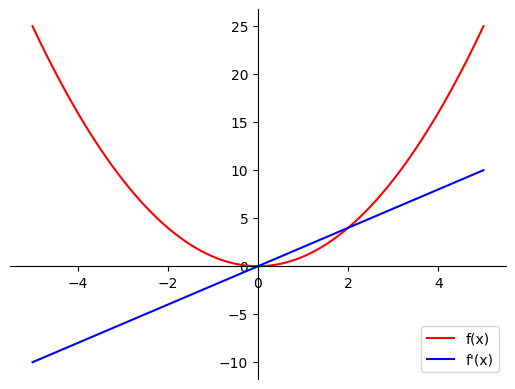

In [4]:
import matplotlib.pyplot as plt

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline

def plot_f1_and_f2(f1, f2=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):
    x = np.linspace(x_min, x_max,100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, f1(x), 'r', label=label1)
    if not f2 is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.        
        if isinstance(f2, np.ndarray):
            plt.plot(x, f2, 'bo', markersize=3, label=label2,)
        else:
            plt.plot(x, f2(x), 'b', label=label2)
    plt.legend()

    plt.show()
    
plot_f1_and_f2(f, dfdx)

In real life the functions are more complicated and it is not possible to calculate the derivatives analytically every time. Let's explore which tools and libraries are available in Python for the computation of derivatives without manual derivation.

<a name='2'></a>
## 2 - Symbolic Differentiation

**Symbolic computation** deals with the computation of mathematical objects that are represented exactly, not approximately (e.g. $\sqrt{2}$ will be written as it is, not as $1.41421356237$). For differentiation it would mean that the output will be somehow similar to if you were computing derivatives by hand using rules (analytically). Thus, symbolic differentiation can produce exact derivatives.

<a name='2.1'></a>
### 2.1 - Introduction to Symbolic Computation with `SymPy`

Let's explore symbolic differentiation in Python with commonly used `SymPy` library.

If you want to compute the approximate decimal value of $\sqrt{18}$, you could normally do it in the following way:

In [5]:
import math

math.sqrt(18)

4.242640687119285

The output $4.242640687119285$ is an approximate result. You may recall that $\sqrt{18} = \sqrt{9 \cdot 2} = 3\sqrt{2}$ and see that it is pretty much impossible to deduct it from the approximate result. But with the symbolic computation systems the roots are not approximated with a decimal number but rather only simplified, so the output is exact:

In [7]:
# This format of module import allows to use the sympy functions without sympy. prefix.
from sympy import *

# This is actually sympy.sqrt function, but sympy. prefix is omitted.
sqrt(18)

3*sqrt(2)

Numerical evaluation of the result is available, and you can set number of the digits to show in the approximated output:

In [13]:
N(sqrt(18),800)

4.2426406871192851464050661726290942357090156261308442195300392139721974353863211165511626029829247182050415386927368910747745081675522116379323644912998074942396679977825167782673998515034583461817144103286799148179108236037905860441855522559226675958286569876914529261429643525192878108839857542239690617601896389954264889218618457750571851642372508632798851895067256610125955710340631238102254965414811606999120970144450916320833709493627434692054788107558647417353893347900061390390468557069617117058655277945837484931462655002612857058180440474162314307564622466971209032961160679456341047576404862275424767971678006256753399564375196681833112779775400934164739404471247890301784576112009559441026584691834871923135217910643941219565768351966120735273683100680823382720881841487214326902512055110

In `SymPy` variables are defined using **symbols**. In this particular library they need to be predefined (a list of them should be provided). Have a look in the cell below, how the symbolic expression, correspoinding to the mathematical expression $2x^2 - xy$, is defined:

In [20]:
# List of symbols.
x, y = symbols('x y')
# Definition of the expression.
expr = 2 * x**2 - x * y
expr

2*x**2 - x*y

Now you can perform various manipulations with this expression: add or subtract some terms, multiply by other expressions etc., just like if you were doing it by hands:

In [22]:
expr_manip = x * (expr + x * y + x**3)
expr_manip

x*(x**3 + 2*x**2)

You can also expand the expression:

In [24]:
expand(expr_manip)

x**4 + 2*x**3

Or factorise it:

In [25]:
factor(expr_manip)

x**3*(x + 2)

To substitute particular values for the variables in the expression, you can use the following code:

In [26]:
expr.evalf(subs={x:-1, y:2})

4.00000000000000

This can be used to evaluate a function $f\left(x\right) = x^2$:

In [27]:
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

You might be wondering now, is it possible to evaluate the symbolic functions for each element of the array? At the beginning of the lab you have defined a `NumPy` array `x_array`:

In [28]:
print(x_array)

[1 2 3]


Now try to evaluate function `f_symb` for each element of the array. You will get an error:

In [29]:
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


It is possible to evaluate the symbolic functions for each element of the array, but you need to make a function `NumPy`-friendly first:

In [31]:
from sympy.utilities.lambdify import lambdify

f_symb_numpy = lambdify(x, f_symb, 'numpy')

The following code should work now:

In [32]:
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]


`SymPy` has lots of great functions to manipulate expressions and perform various operations from calculus. More information about them can be found in the official documentation [here](https://docs.sympy.org/).

<a name='2.2'></a>
### 2.2 - Symbolic Differentiation with `SymPy`

Let's try to find a derivative of a simple power function using `SymPy`:

In [ ]:
diff(x**3,x)

Some standard functions can be used in the expression, and `SymPy` will apply required rules (sum, product, chain) to calculate the derivative:

In [ ]:
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x), x)
dfdx_composed

Now calculate the derivative of the function `f_symb` defined in [2.1](#2.1) and make it `NumPy`-friendly:

In [ ]:
dfdx_symb = diff(f_symb, x)
dfdx_symb_numpy = lambdify(x, dfdx_symb, 'numpy')

Evaluate function `dfdx_symb_numpy` for each element of the `x_array`:

In [ ]:
print("x: \n", x_array)
print("f'(x) = 2x: \n", dfdx_symb_numpy(x_array))

You can apply symbolically defined functions to the arrays of larger size. The following code will plot function and its derivative, you can see that it works:

In [ ]:
plot_f1_and_f2(f_symb_numpy, dfdx_symb_numpy)

<a name='2.3'></a>
### 2.3 - Limitations of Symbolic Differentiation

Symbolic Differentiation seems to be a great tool. But it also has some limitations. Sometimes the output expressions are too complicated and even not possible to evaluate. For example, find the derivative of the function $$\left|x\right| = \begin{cases} x, \ \text{if}\ x > 0\\  -x, \ \text{if}\ x < 0 \\ 0, \ \text{if}\ x = 0\end{cases}$$ Analytically, its derivative is:
$$\frac{d}{dx}\left(\left|x\right|\right) = \begin{cases} 1, \ \text{if}\ x > 0\\  -1, \ \text{if}\ x < 0\\\ \text{does not exist}, \ \text{if}\ x = 0\end{cases}$$

Have a look the output from the symbolic differentiation:

In [ ]:
dfdx_abs = diff(abs(x),x)
dfdx_abs

Looks complicated, but it would not be a problem if it was possible to evaluate. But check, that for $x=-2$ instead of the derivative value $-1$ it outputs some unevaluated expression:

In [ ]:
dfdx_abs.evalf(subs={x:-2})

And in the `NumPy` friendly version it also will give an error:

In [ ]:
dfdx_abs_numpy = lambdify(x, dfdx_abs,'numpy')

try:
    dfdx_abs_numpy(np.array([1, -2, 0]))
except NameError as err:
    print(err)

In fact, there are problems with the evaluation of the symbolic expressions wherever there is a "jump" in the derivative (e.g. function expressions are different for different intervals of $x$), like it happens with $\frac{d}{dx}\left(\left|x\right|\right)$. 

Also, you can see in this example, that you can get a very complicated function as an output of symbolic computation. This is called **expression swell**, which results in unefficiently slow computations. You will see the example of that below after learning other differentiation libraries in Python.

<a name='3'></a>
## 3 - Numerical Differentiation

This method does not take into account the function expression. The only important thing is that the function can be evaluated in the nearby points $x$ and $x+\Delta x$, where $\Delta x$ is sufficiently small. Then $\frac{df}{dx}\approx\frac{f\left(x + \Delta x\right) - f\left(x\right)}{\Delta x}$, which can be called a **numerical approximation** of the derivative. 

Based on that idea there are different approaches for the numerical approximations, which somehow vary in the computation speed and accuracy. However, for all of the methods the results are not accurate - there is a round off error. At this stage there is no need to go into details of various methods, it is enough to investigate one of the numerial differentiation functions, available in `NumPy` package.

<a name='3.1'></a>
### 3.1 - Numerical Differentiation with `NumPy`

You can call function `np.gradient` to find the derivative of function $f\left(x\right) = x^2$ defined above. The first argument is an array of function values, the second defines the spacing $\Delta x$ for the evaluation. Here pass it as an array of $x$ values, the differences will be calculated automatically. You can find the documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html).

In [ ]:
x_array_2 = np.linspace(-5, 5, 100)
dfdx_numerical = np.gradient(f(x_array_2), x_array_2)

plot_f1_and_f2(dfdx_symb_numpy, dfdx_numerical, label1="f'(x) exact", label2="f'(x) approximate")

Try to do numerical differentiation for more complicated function:

In [ ]:
def f_composed(x):
    return np.exp(-2*x) + 3*np.sin(3*x)

plot_f1_and_f2(lambdify(x, dfdx_composed, 'numpy'), np.gradient(f_composed(x_array_2), x_array_2),
              label1="f'(x) exact", label2="f'(x) approximate")

The results are pretty impressive, keeping in mind that it does not matter at all how the function was calculated - only the final values of it!

<a name='3.2'></a>
### 3.2 - Limitations of Numerical Differentiation

Obviously, the first downside of the numerical differentiation is that it is not exact. However, the accuracy of it is normally enough for machine learning applications. At this stage there is no need to evaluate errors of the numerical differentiation.

Another problem is similar to the one which appeared in the symbolic differentiation: it is inaccurate at the points where there are "jumps" of the derivative. Let's compare the exact derivative of the absolute value function and with numerical approximation:

In [ ]:
def dfdx_abs(x):
    if x > 0:
        return 1
    else:
        if x < 0:
            return -1
        else:
            return None

plot_f1_and_f2(np.vectorize(dfdx_abs), np.gradient(abs(x_array_2), x_array_2))

You can see that the results near the "jump" are $0.5$ and $-0.5$, while they should be $1$ and $-1$. These cases can give significant errors in the computations.

But the biggest problem with the numerical differentiation is slow speed. It requires function evalutation every time.  In machine learning models there are hundreds of parameters and there are hundreds of derivatives to be calculated, performing full function evaluation every time slows down the computation process. You will see the example of it below.

<a name='4'></a>
## 4 - Automatic Differentiation

**Automatic differentiation** (autodiff) method breaks down the function into common functions ($sin$, $cos$, $log$, power functions, etc.), and constructs the computational graph consisting of the basic functions. Then the chain rule is used to compute the derivative at any node of the graph. It is the most commonly used approach in machine learning applications and neural networks, as the computational graph for the function and its derivatives can be built during the construction of the neural network, saving in future computations.

The main disadvantage of it is implementational difficulty. However, nowadays there are libraries that are convenient to use, such as [MyGrad](https://mygrad.readthedocs.io/en/latest/index.html), [Autograd](https://autograd.readthedocs.io/en/latest/) and [JAX](https://jax.readthedocs.io/en/latest/). `Autograd` and `JAX` are the most commonly used in the frameworks to build neural networks. `JAX` brings together `Autograd` functionality for optimization problems, and `XLA` (Accelerated Linear Algebra) compiler for parallel computing.

The syntax of `Autograd` and `JAX` are slightly different. It would be overwhelming to cover both at this stage. In this notebook you will be performing automatic differentiation using one of them: `JAX`.

<a name='4.1'></a>
### 4.1 - Introduction to `JAX`

To begin with, load the required libraries. From `jax` package you need to load just a couple of functions for now (`grad` and `vmap`). Package `jax.numpy` is a wrapped `NumPy`, which pretty much replaces `NumPy` when `JAX` is used. It can be loaded as `np` as if it was an original `NumPy` in most of the cases. However, in this notebook you'll upload it as `jnp` to distinguish them for now.

In [ ]:
from jax import grad, vmap
import jax.numpy as jnp

Create a new `jnp` array and check its type.

In [ ]:
x_array_jnp = jnp.array([1., 2., 3.])

print("Type of NumPy array:", type(x_array))
print("Type of JAX NumPy array:", type(x_array_jnp))
# Please ignore the warning message if it appears.

The same array can be created just converting previously defined `x_array = np.array([1, 2, 3])`, although in some cases `JAX` does not operate with integers, thus the values need to be converted to floats. You will see an example of it below.

In [ ]:
x_array_jnp = jnp.array(x_array.astype('float32'))
print("JAX NumPy array:", x_array_jnp)
print("Type of JAX NumPy array:", type(x_array_jnp))

Note, that `jnp` array has a specific type `jaxlib.xla_extension.DeviceArray`. In most of the cases the same operators and functions are applicable to them as in the original `NumPy`, for example:

In [ ]:
print(x_array_jnp * 2)
print(x_array_jnp[2])

But sometimes working with `jnp` arrays the approach needs to be changed. In the following code, trying to assign a new value to one of the elements, you will get an error:

In [ ]:
try:
    x_array_jnp[2] = 4.0
except TypeError as err:
    print(err)

To assign a new value to an element in the `jnp` array you need to apply functions `.at[i]`, stating which element to update, and `.set(value)` to set a new value. These functions also operate **out-of-place**, the updated array is returned as a new array and the original array is not modified by the update.

In [ ]:
y_array_jnp = x_array_jnp.at[2].set(4.0)
print(y_array_jnp)

Although, some of the `JAX` functions will work with arrays defined with `np` and `jnp`. In the following code you will get the same result in both lines:

In [ ]:
print(jnp.log(x_array))
print(jnp.log(x_array_jnp))

This is probably confusing - which `NumPy` to use then? Usually when `JAX` is used, only `jax.numpy` gets imported as `np`, and used instead of the original one.

 <a name='4.2'></a>
### 4.2 - Automatic Differentiation with `JAX` 

Time to do automatic differentiation with `JAX`. The following code will calculate the derivative of the previously defined function $f\left(x\right) = x^2$ at the point $x = 3$:

In [ ]:
print("Function value at x = 3:", f(3.0))
print("Derivative value at x = 3:",grad(f)(3.0))

Very easy, right? Keep in mind, please, that this cannot be done using integers. The following code will output an error:

In [ ]:
try:
    grad(f)(3)
except TypeError as err:
    print(err)

Try to apply the `grad` function to an array, calculating the derivative for each of its elements: 

In [ ]:
try:
    grad(f)(x_array_jnp)
except TypeError as err:
    print(err)

There is some broadcasting issue there. You don't need to get into more details of this at this stage, function `vmap` can be used here to solve the problem.

*Note*: Broadcasting is covered in the Course 1 of this Specialization "Linear Algebra". You can also review it in the documentation [here](https://numpy.org/doc/stable/user/basics.broadcasting.html#:~:text=The%20term%20broadcasting%20describes%20how,that%20they%20have%20compatible%20shapes.).

In [ ]:
dfdx_jax_vmap = vmap(grad(f))(x_array_jnp)
print(dfdx_jax_vmap)

Great, now `vmap(grad(f))` can be used to calculate the derivative of function `f` for arrays of larger size and you can plot the output:

In [ ]:
plot_f1_and_f2(f, vmap(grad(f)))

In the following code you can comment/uncomment lines to visualize the common derivatives. All of them are found using `JAX` automatic differentiation. The results look pretty good!

In [ ]:
def g(x):
#     return x**3
#     return 2*x**3 - 3*x**2 + 5
#     return 1/x
#     return jnp.exp(x)
#     return jnp.log(x)
#     return jnp.sin(x)
#     return jnp.cos(x)
    return jnp.abs(x)
#     return jnp.abs(x)+jnp.sin(x)*jnp.cos(x)

plot_f1_and_f2(g, vmap(grad(g)))

<a name='5'></a>
## 5 - Computational Efficiency of Symbolic, Numerical and Automatic Differentiation

In sections [2.3](#2.3) and [3.2](#3.2) low computational efficiency of symbolic and numerical differentiation was discussed. Now it is time to compare speed of calculations for each of three approaches. Try to find the derivative of the same simple function $f\left(x\right) = x^2$ multiple times, evaluating it for an array of a larger size, compare the results and time used:

In [ ]:
import timeit, time

x_array_large = np.linspace(-5, 5, 1000000)

tic_symb = time.time()
res_symb = lambdify(x, diff(f(x),x),'numpy')(x_array_large)
toc_symb = time.time()
time_symb = 1000 * (toc_symb - tic_symb)  # Time in ms.

tic_numerical = time.time()
res_numerical = np.gradient(f(x_array_large),x_array_large)
toc_numerical = time.time()
time_numerical = 1000 * (toc_numerical - tic_numerical)

tic_jax = time.time()
res_jax = vmap(grad(f))(jnp.array(x_array_large.astype('float32')))
toc_jax = time.time()
time_jax = 1000 * (toc_jax - tic_jax)

print(f"Results\nSymbolic Differentiation:\n{res_symb}\n" + 
      f"Numerical Differentiation:\n{res_numerical}\n" + 
      f"Automatic Differentiation:\n{res_jax}")

print(f"\n\nTime\nSymbolic Differentiation:\n{time_symb} ms\n" + 
      f"Numerical Differentiation:\n{time_numerical} ms\n" + 
      f"Automatic Differentiation:\n{time_jax} ms")

The results are pretty much the same, but the time used is different. Numerical approach is obviously inefficient when differentiation needs to be performed many times, which happens a lot training machine learning models. Symbolic and automatic approach seem to be performing similarly for this simple example. But if the function becomes a little bit more complicated, symbolic computation will experiance significant expression swell and the calculations will slow down.

*Note*: Sometimes the execution time results may vary slightly, especially for automatic differentiation. You can run the code above a few time to see different outputs. That does not influence the conclusion that numerical differentiation is slower. `timeit` module can be used more efficiently to evaluate execution time of the codes, but that would unnecessary overcomplicate the codes here.

Try to define some polynomial function, which should not be that hard to differentiate, and compare the computation time for its differentiation symbolically and automatically:

In [ ]:
def f_polynomial_simple(x):
    return 2*x**3 - 3*x**2 + 5

def f_polynomial(x):
    for i in range(3):
        x = f_polynomial_simple(x)
    return x

tic_polynomial_symb = time.time()
res_polynomial_symb = lambdify(x, diff(f_polynomial(x),x),'numpy')(x_array_large)
toc_polynomial_symb = time.time()
time_polynomial_symb = 1000 * (toc_polynomial_symb - tic_polynomial_symb)

tic_polynomial_jax = time.time()
res_polynomial_jax = vmap(grad(f_polynomial))(jnp.array(x_array_large.astype('float32')))
toc_polynomial_jax = time.time()
time_polynomial_jax = 1000 * (toc_polynomial_jax - tic_polynomial_jax)

print(f"Results\nSymbolic Differentiation:\n{res_polynomial_symb}\n" + 
      f"Automatic Differentiation:\n{res_polynomial_jax}")

print(f"\n\nTime\nSymbolic Differentiation:\n{time_polynomial_symb} ms\n" +  
      f"Automatic Differentiation:\n{time_polynomial_jax} ms")

Again, the results are similar, but automatic differentiation is times faster. 

With the increase of function computation graph, the efficiency of automatic differentiation compared to other methods raises, because autodiff method uses chain rule!

Congratulations! Now you are equiped with Python tools to perform differentiation.